In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [265]:
X, Y = load_boston().data, load_boston().target

**Linear Regression**

the formula for linear regression is $\hat{Y} = \beta_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $. 
It can be solved using $\frac{\partial RSS}{\partial{\beta}} = 0$


In [289]:
class Regression:
    def __init__(self, fit_intercept=False):
        """
        Method is responsible for setting most variables.
        
        Attributes
        ----------
        fit_intercept : bool
            Whether to calculate the intercept for this model. 
            If set to False, no intercept will be used in calculations
        """
        self.fit_intercept = fit_intercept
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return X @ self.beta
        

class LinearRegression():
    """
    Standard linear regression using normal equation. 
    It is not really efficient when a number of features
    is very large.
    """
    def __init__(self, fit_intercept=False):
        """
        Method is responsible for setting most variables.
        
        Attributes
        ----------
        fit_intercept : bool
            Whether to calculate the intercept for this model. 
            If set to False, no intercept will be used in calculations
        """
        self.fit_intercept = fit_intercept
        
    def _add_intercept(self):     
        if self.fit_intercept:
            x0_array = np.ones([self.X.shape[0], 1])
            self.X = np.concatenate((x0_array, self.X), axis=1)
        
    def fit(self, X, Y):
        self._add_intercept()
        X_X = X.T @ X
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
    def predict(self, X):
        return X @ self.beta
    
class Ridge(LinearRegression):
    def __init__(self, alpha=0.1, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        
    def fit(self, X, Y):
        alpha_mat = np.eye(X.shape[1]) * self.alpha
        X_X = X.T @ X + alpha_mat
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
        
class Lasso:
    def __init__(self, alpha=1.0, *, fit_intercept=True, max_iter=1000, tol=0.01):
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.tol = tol
        
    def _add_intercept(self, X):
        """
        Function is responsible for adding intercept to features.
        """
        intercept = np.ones(X.shape[0]).reshape(-1, 1)
        X = np.concatenate((intercept, X), axis=1)
        return X
    
    def _get_regularization(self, weigth):
        return self.alpha * np.sign(weight)
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self._add_intercept(X)
            
        n, m = X.shape
        beta = np.zeros(m)
        
        for i in range(self.max_iter):
            beta = self.update_beta(beta, X, Y)
        
        self.beta = beta
    
    def update_beta(self, beta, X, Y):
        Y_pred = X @ beta
        gradient = -(X.T @ (Y - Y_pred)) + alpha * np.sign(beta)
        beta -= tol * gradient / n
        return beta
    
    def predict(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return X @ self.beta

In [267]:
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6167576730333505

In [268]:
model = Ridge()
model.fit(X, Y)
Y_pred = model.predict(X)
r2_score(Y_pred, Y)

0.6165888743237311

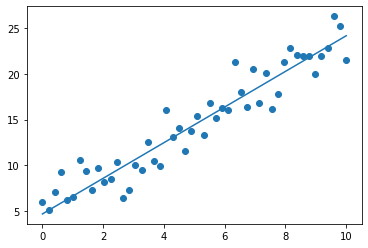

In [290]:
rng = np.random.RandomState(42)
X = np.linspace(0, 10, 50)
Y = 5 + 2 * X + rng.randn(50) * 2

lasso = Lasso()
lasso.fit(X.reshape(-1,1), Y)
Y_pred = lasso.predict(X.reshape(-1,1))
plt.scatter(X, Y)
plt.plot(X, Y_pred)